In [1]:
import os
from isatools.model import (Investigation, Study, Assay, Person, Material,
                            DataFile, plink,
                            OntologySource, OntologyAnnotation, Sample,
                            Source, Characteristic, Protocol, Process)
from isatools import isatab
final_dir = os.path.abspath(os.path.join('output', 'issue-364'))

log_level: error
LOG: <Logger isatools (DEBUG)>
/Users/massi/.pyenv/versions/3.8.2/envs/isa-create-notebook-3.8.2/src/isatools/isatools/net/resources/saxon9/saxon9he.jar


In [2]:
investigation = Investigation()
investigation.identifier = "PERISCOPE"
investigation.title = "PERtussIS COrrelates of Protection Europe"
investigation.description = """Investigates Bordatela pertussis infection and aims to accelerate the development of new vaccines"""

In [3]:
bert_study = Study(filename="s_bert.txt")

bert_study.identifier = "BERT"
bert_study.title = "Booster Against Pertussis"
bert_study.description = """The BERT Booster against pertussis (whooping cough) study investigates
long-term protection against pertussis by giving a repeated vaccination against pertussis."""


In [4]:
hcm_study = Study(filename="s_hcm.txt")
hcm_study.identifier = "HCM"
hcm_study.title = "Human Challenge Colonisation"
hcm_study.description = """The Human Challenge study investigates the effect of the Bordatela pertussis (whooping cough)
inoculation on healthy individuals"""

In [5]:
evi_van_schuppen = Person(first_name="Evi", last_name="van Schuppen", affiliation="Radboud UMC", email="evi.vanSchuppen@radboudumc.nl")
guy_berbers = Person(first_name="Guy", last_name="Berbers", affiliation="RIVM, the Netherlands", email="guy.berbers@rivm.nl")
alex_barkoff = Person(first_name="Alex", last_name="Barkoff", affiliation="University of Turku", email="ambark@utu.fi")
pieter_van_gageldonk = Person(first_name="Pieter", last_name="van Gageldonk", affiliation="RIVM, the Netherlands", email="pieter.van.gageldonk@rivm.nl")
alison_hill = Person(first_name="Alison", last_name="Hill", affiliation="University of Southampton", email="email:ah1g12@soton.ac.uk")

In [6]:
hcm_study.contacts.extend([alison_hill, evi_van_schuppen, guy_berbers])
bert_study.contacts.extend([evi_van_schuppen, guy_berbers, alex_barkoff, pieter_van_gageldonk])


In [7]:
ncbi_taxon = OntologySource(name='NCBITaxon', description="NCBI Taxonomy")
human_characteristic= Characteristic(category=OntologyAnnotation(term="Organism"),
                                     value=OntologyAnnotation(term="Homo Sapiens", term_source=ncbi_taxon,
                                                              term_accession="http://purl.bioontology.org/ontology/NCBITAXON/9606"))

In [8]:
subject = Source(name='human individual', characteristics=[human_characteristic]) 
serum_0 = Sample(name='serum')
serum_1 = Sample(name='serum')
mlf_0 = Sample(name='nasal mucosal lining fluid')
mlf_1 = Sample(name='nasal mucosal lining fluid')
unknown_src = Source(name="unknown")

bert_study.samples.extend([serum_0])
hcm_study.samples.extend([serum_1])
bert_study.samples.extend([mlf_0])
hcm_study.samples.extend([mlf_1])

In [9]:
unknown_collection_process = Process(name="unknown")

bert_mlf_protocol = Protocol(name="sample collection bert",
                             protocol_type=OntologyAnnotation(term="collect_mlf"))
bert_study.protocols.append(bert_mlf_protocol)
bert_mlf_process = Process(executes_protocol=bert_mlf_protocol)
bert_mlf_process.inputs.append(subject)
bert_mlf_process.outputs.append(mlf_0)
bert_study.process_sequence.append(bert_mlf_process)

In [10]:
bert_serum_protocol = Protocol(name="sample collection bert",
                               protocol_type=OntologyAnnotation(term="collect_serum"))
bert_study.protocols.append(bert_serum_protocol)
bert_serum_process = Process(executes_protocol=bert_serum_protocol)
bert_serum_process.inputs.append(subject)
bert_serum_process.outputs.append(serum_0)
bert_study.process_sequence.append(bert_serum_process)


In [11]:
hcm_mlf_protocol = Protocol(name="sample collection mlf",
                            protocol_type=OntologyAnnotation(term="collect_mlf"))
hcm_study.protocols.append(hcm_mlf_protocol)
hcm_mlf_process = Process(executes_protocol=hcm_mlf_protocol)
hcm_mlf_process.inputs.append(subject)
hcm_mlf_process.outputs.append(mlf_1)
hcm_study.process_sequence.append(hcm_mlf_process)

In [12]:
hcm_serum_protocol = Protocol(name="sample collection mlf 2",
                              protocol_type=OntologyAnnotation(term="collect_serum"))
hcm_study.protocols.append(hcm_serum_protocol)
hcm_serum_process = Process(executes_protocol=hcm_serum_protocol)
hcm_serum_process.inputs.append(subject)
hcm_serum_process.outputs.append(serum_1)
hcm_study.process_sequence.append(hcm_serum_process)

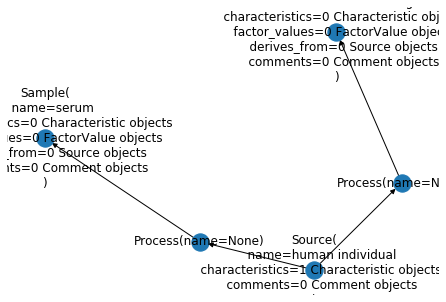

In [13]:
%matplotlib inline
import networkx as nx
hcm_graph = hcm_study.graph
nx.draw(hcm_graph, with_labels = True)

In [14]:
# extraction_protocol = Protocol(name='extraction', protocol_type=OntologyAnnotation(term="material extraction"))
# bert_study.protocols.append(extraction_protocol)
# hcm_study.protocols.append(extraction_protocol)

In [15]:
# mia_protocol = Protocol(name='multiplex immuno assay', protocol_type=OntologyAnnotation(term="mia"))
# bert_study.protocols.append(mia_protocol)
# hcm_study.protocols.append(mia_protocol)

In [16]:
investigation.studies.append(bert_study)
investigation.studies.append(hcm_study)
isatab.dump(isa_obj=investigation, output_path=final_dir)

2020-10-14 17:17:21,495 [INFO]: isatab.py(_all_end_to_end_paths:1152) >> Found 2 paths!
2020-10-14 17:17:21,499 [INFO]: isatab.py(write_study_table_files:1330) >> Rendered 2 paths
2020-10-14 17:17:21,502 [INFO]: isatab.py(write_study_table_files:1337) >> Writing 2 rows
2020-10-14 17:17:21,510 [INFO]: isatab.py(_all_end_to_end_paths:1152) >> Found 2 paths!


KeyError: 'Protocol REF.sample collection mlf'